In [2]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [ ]:
heart = pd.read_csv('./data_heart/Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

heart.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


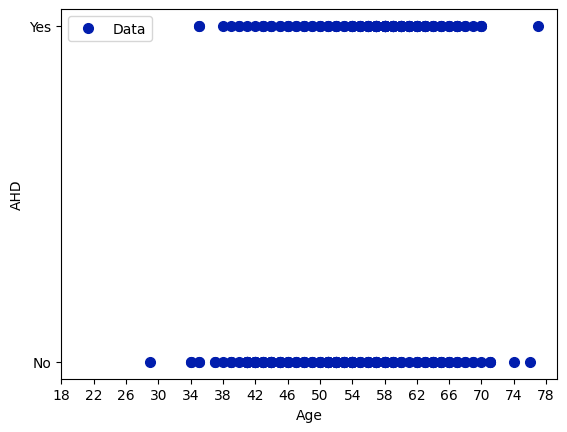

In [5]:
# Make a plot of the response (AHD) vs the predictor (Age)

plt.plot(heart[['Age']].values, heart['AHD'].values ,'o', markersize=7,color="#011DAD",label="Data")

plt.xticks(np.arange(18, 80, 4.0))
plt.xlabel("Age")
plt.ylabel("AHD")
plt.yticks((0,1), labels=('No', 'Yes'))

plt.legend()
plt.show()

In [27]:
# split into train and validation
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 5)

# select variables for model estimation
x_train = heart_train[['MaxHR']]
y_train = heart_train['AHD']

x_val = heart_val[['MaxHR']]
y_val = heart_val['AHD']

### Simple linear regression model fitting

Define and fit a linear regression model to predict `Age` from `MaxHR`.

In [28]:
# Create a linear regression model, with random state=5

regress1 = LinearRegression(fit_intercept=True).fit(x_train,y_train)

print("Linear Regression Estimated Betas:",regress1.intercept_,regress1.coef_[0])

Linear Regression Estimated Betas: 1.7441310948919715 -0.008479947574049154


c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


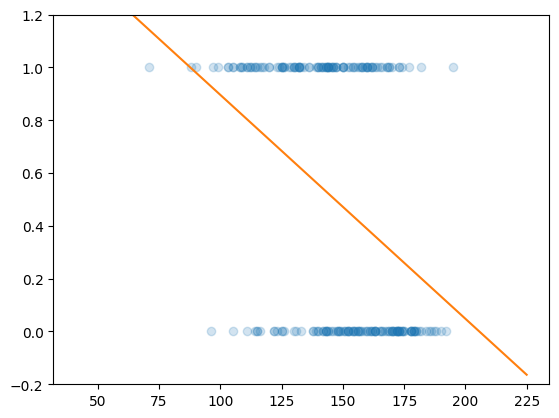

In [29]:
# Plot the estimated probability for training data
dummy_x=np.linspace(np.min(x_train)-30,np.max(x_train)+30)
yhat_regress = regress1.predict(dummy_x.reshape(-1,1))
plt.plot(x_train, y_train, 'o' ,alpha=0.2, label='Data')
plt.plot(dummy_x, yhat_regress, label = "OLS")

plt.ylim(-0.2, 1.2)
plt.show()

### What could go wrong with this linear regression model? 

*your answer here*

### Simple logisitc regression model fitting

Define and fit a logistic regression model with random state=5 to predict `Age` from `MaxHR`.

In [30]:
### edTest(test_logit1) ###
# Create a logistic regression model, with random state=5 and no penalty

logit1 = LogisticRegression(C=100000, max_iter = 1000, random_state=5)

#Fit the model using the training set

logit1.fit(x_train,y_train)

# Get the coefficient estimates

print("Logistic Regression Estimated Betas (B0,B1):",logit1.intercept_,logit1.coef_)

Logistic Regression Estimated Betas (B0,B1): [5.82341351] [[-0.03954458]]


### Interpret the Coefficient Estimates

### Calculate the estimated probability that a person with age 60 will have AHD in the ICU.

**your answer here**

In [31]:
# Confirm the probability calculation above using logit1.predict()
# Be careful as to how you define the new observation.  Hint: double brackets is one way to do it

logit1.predict_proba(x_val)

array([[0.73454374, 0.26545626],
       [0.47765268, 0.52234732],
       [0.79152728, 0.20847272],
       [0.66850758, 0.33149242],
       [0.35353685, 0.64646315],
       [0.63257149, 0.36742851],
       [0.53688751, 0.46311249],
       [0.7979774 , 0.2020226 ],
       [0.69425259, 0.30574741],
       [0.26914313, 0.73085687],
       [0.59509923, 0.40490077],
       [0.29310721, 0.70689279],
       [0.53688751, 0.46311249],
       [0.11638339, 0.88361661],
       [0.25387266, 0.74612734],
       [0.6140042 , 0.3859958 ],
       [0.40944481, 0.59055519],
       [0.6140042 , 0.3859958 ],
       [0.44816623, 0.55183377],
       [0.70258149, 0.29741851],
       [0.26914313, 0.73085687],
       [0.86391982, 0.13608018],
       [0.3445522 , 0.6554478 ],
       [0.72676181, 0.27323819],
       [0.64171351, 0.35828649],
       [0.65075365, 0.34924635],
       [0.62333312, 0.37666688],
       [0.62333312, 0.37666688],
       [0.59509923, 0.40490077],
       [0.64171351, 0.35828649],
       [0.

### Accuracy computation

In [32]:
### edTest(test_accuracy) ###

# Compute the training & validation accuracy 

train_accuracy = logit1.score(x_train , y_train)
val_accuracy = logit1.score(x_val , y_val)

# Print the two accuracies below

print("Train Accuracy", train_accuracy)
print("Validation Accuracy", val_accuracy)

Train Accuracy 0.6916299559471366
Validation Accuracy 0.7631578947368421


### Plot the predictions

c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\kyungho\anaconda3\envs\lecture_data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


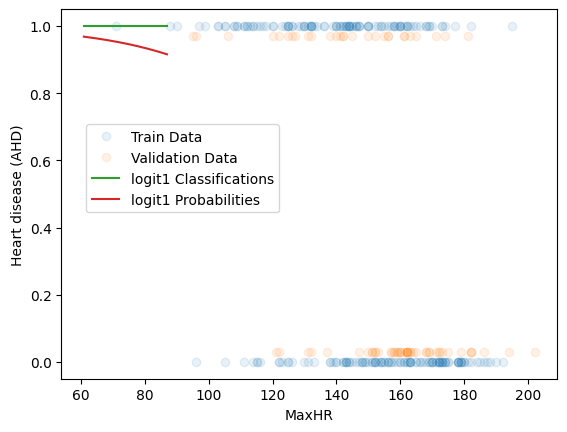

In [ ]:
x=np.linspace(np.min(heart[['MaxHR']])-10,np.max(heart[['MaxHR']])+10,200)
x = x.reshape(-1,1)

yhat_class_logit = logit1.predict(x)
yhat_prob_logit = logit1.predict_proba(x)[:,1]

# plot the observed data
plt.plot(x_train, y_train, 'o' ,alpha=0.1, label='Train Data')
plt.plot(x_val, 0.94*y_val+0.03, 'o' ,alpha=0.1, label='Validation Data')

# plot the predictions
plt.plot(x, yhat_class_logit, label='logit1 Classifications')
plt.plot(x, yhat_prob_logit, label='logit1 Probabilities')

# put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
plt.legend(loc=(0.05,0.45))

# Don't forget your axis labels!
plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")

plt.show()


### Statistical Inference
Train a new logistic regression model using statsmodels package. Print model summary and interpret the results.

In [35]:
### edTest(test_logit2) ###
# adding a column of ones to X
x_train_with_constant = sm.add_constant(x_train)
x_val_with_constant = sm.add_constant(x_val)

# train a new model using statsmodels package
logreg = sm.Logit(y_train, x_train_with_constant).fit()
print(logreg.summary())


Optimization terminated successfully.
         Current function value: 0.608738
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  227
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.1215
Time:                        11:53:17   Log-Likelihood:                -138.18
converged:                       True   LL-Null:                       -157.29
Covariance Type:            nonrobust   LLR p-value:                 6.348e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8234      1.073      5.426      0.000       3.720       7.927
MaxHR         -0.0395      0.